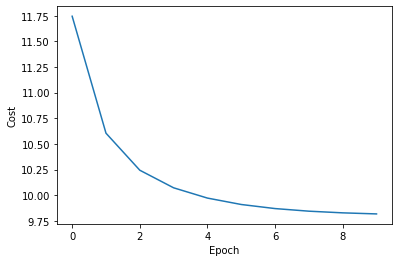

Final cost: 9.817799447002344
Weight values: [ 0.11819873 -1.36470855  0.82758876 -0.36345867  1.51549972 -0.87035927
  0.44656695 -1.24935736]
Bias values: 1.9652596657311305


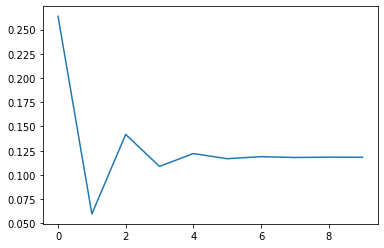

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, model_selection
from aicore.ml import data
import pandas as pd
import numpy as np

def plot_loss(losses):
    """Helper function for plotting loss against epoch"""
    plt.figure() # make a figure
    plt.ylabel('Cost')
    plt.xlabel('Epoch')
    plt.plot(losses) # plot costs
    plt.show()

def mse_loss(y_hat, labels): # define our criterion (loss function)
    errors = y_hat - labels ## calculate errors
    squared_errors = errors ** 2 ## square errors
    mean_squared_error = sum(squared_errors) / len(squared_errors) ## calculate mean 
    return mean_squared_error # return loss

class LinearRegression:
    def __init__(self, optimiser, n_features): # initalize parameters 
        self.w = np.random.randn(n_features) ## randomly initialise weight
        self.b = np.random.randn() ## randomly initialise bias
        self.optimiser = optimiser
        
    def predict(self, X): # how do we calculate output from an input in our model?
        ypred = X @ self.w + self.b ## make a prediction using a linear hypothesis
        return ypred # return prediction

    def fit(self, X, y):
        all_costs = [] ## initialise empty list of costs to plot later
        all_weights = []
        for epoch in range(self.optimiser.epochs): ## for this many complete runs through the dataset    

            # MAKE PREDICTIONS AND UPDATE MODEL
            predictions = self.predict(X) ## make predictions
            new_w, new_b = self.optimiser.step(self.w, self.b, X, predictions, y) ## calculate updated params
            self._update_params(new_w, new_b) ## update model weight and bias
            
            # CALCULATE LOSS FOR VISUALISING
            cost = mse_loss(predictions, y) ## compute loss 
            all_costs.append(cost) ## add cost for this batch of examples to the list of costs (for plotting)
            all_weights.append(self.w[0]) ## add the first weight to the list of weights (for plotting)
        
        plot_loss(all_costs)
        plt.plot(all_weights)
        print('Final cost:', cost)
        print('Weight values:', self.w)
        print('Bias values:', self.b)

    
    def _update_params(self, new_w, new_b):
        self.w = new_w ## set this instance's weights to the new weight value passed to the function
        self.b = new_b ## do the same for the bias

class SGDOptimiser:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs

    def _calc_deriv(self, features, predictions, labels):
        m = len(labels) ## m = number of examples
        diffs = predictions - labels ## calculate errors
        dLdw = 2 * np.sum(features.T * diffs).T / m ## calculate derivative of loss with respect to weights
        dLdb = 2 * np.sum(diffs) / m ## calculate derivative of loss with respect to bias
        return dLdw, dLdb ## return rate of change of loss wrt w and wrt b

    def step(self, w, b, features, predictions, labels):
        dLdw, dLdb = self._calc_deriv(features, predictions, labels)
        new_w = w - self.lr * dLdw
        new_b = b - self.lr * dLdb
        return new_w, new_b

# Use `data.split` in order to split the data into train, validation, test
(X_train, y_train), (X_validation, y_validation), (X_test, y_test) = data.split(
    datasets.fetch_california_housing(return_X_y=True)
)
X_train, X_validation, X_test = data.standardize_multiple(X_train, X_validation, X_test)

num_epochs = 10
learning_rate = 0.1

optimiser = SGDOptimiser(lr=learning_rate, epochs=num_epochs)
model = LinearRegression(optimiser=optimiser, n_features=X_train.shape[1])
model.fit(X_train, y_train)

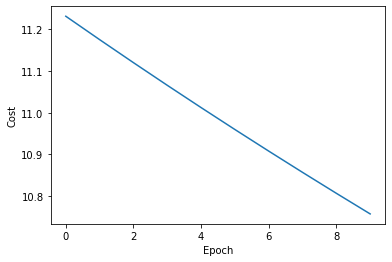

Final cost: 10.757314033428154
Weight values: [-0.53818166 -0.07467911  0.34690897 -1.10987543 -0.82116143  0.66963537
 -0.4501328   0.39890127]
Bias values: -0.49523553697642864


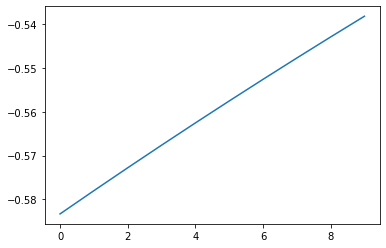

In [31]:
learning_rate = 0.001

optimiser = SGDOptimiser(lr=learning_rate, epochs=num_epochs)
model = LinearRegression(optimiser=optimiser, n_features=X_train.shape[1])
model.fit(X_train, y_train)

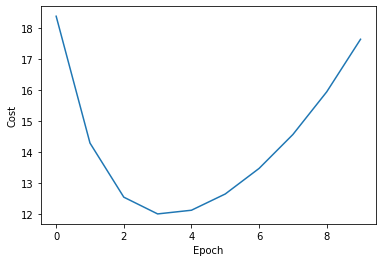

Final cost: 17.644840918803332
Weight values: [0.39080484 2.68350492 2.20889461 1.66318522 1.23510422 0.28679092
 1.40558894 0.50581259]
Bias values: 1.990558201783968


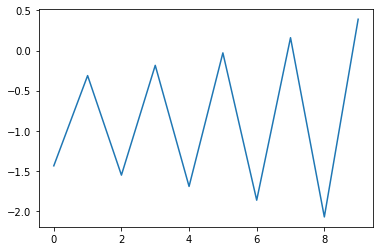

In [37]:
learning_rate = 0.15

optimiser = SGDOptimiser(lr=learning_rate, epochs=num_epochs)
model = LinearRegression(optimiser=optimiser, n_features=X_train.shape[1])
model.fit(X_train, y_train)